In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/intercampusai2019/train.csv
/kaggle/input/intercampusai2019/test.csv
/kaggle/input/intercampusai2019/sample_submission2.csv


**IMPORTING DATA**

**Read Data from File Location (either locally or from a cloud location)
and store as Process_Train, Process_Test and Process_Sample**

In [16]:
Process_Train = pd.read_csv("/kaggle/input/intercampusai2019/train.csv")
Process_Test = pd.read_csv("/kaggle/input/intercampusai2019/test.csv")
Process_Sample = pd.read_csv("/kaggle/input/intercampusai2019/sample_submission2.csv")

**The training data initially has 38312 observations and a total of 19 features with float64(1), int64(7), object(11) including the label feature

In [17]:
Process_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

**The test data initially has 16496 observations and a total of 18 features with float64(1), int64(6), object(11)

In [18]:
Process_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

In [19]:
Process_Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 2 columns):
EmployeeNo         16496 non-null object
Promoted_or_Not    16496 non-null int64
dtypes: int64(1), object(1)
memory usage: 257.9+ KB


Previwing Train, Test and Submission Data

In [20]:
Process_Train

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1990,0.0,2018,0,0,70,LAGOS,Yes,Married,No,No,0,0
38308,YAK/S/54805,Customer Support and Field Operations,"MSc, MBA and PhD",Female,Agency and others,2,1984,5.0,2013,0,0,48,IMO,Yes,Married,No,No,1,0
38309,YAK/S/54806,Information and Strategy,First Degree or HND,Male,Agency and others,2,1994,12.5,2016,1,0,71,ANAMBRA,No,Married,No,No,3,0
38310,YAK/S/54807,Commercial Sales and Marketing,NaN,Male,Direct Internal process,2,1992,2.5,2017,0,0,37,KWARA,Yes,Married,No,No,1,0


In [21]:
Process_Test

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16491,YAK/S/54797,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1987,7.5,2012,0,0,52,PLATEAU,Yes,Married,No,No,1
16492,YAK/S/54798,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1993,12.5,2016,1,1,39,OGUN,Yes,Single,No,No,0
16493,YAK/S/54800,Sourcing and Purchasing,"MSc, MBA and PhD",Female,Agency and others,2,1971,12.5,2013,1,1,59,NASSARAWA,Yes,Married,No,No,0
16494,YAK/S/54803,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1990,2.5,2017,0,0,41,OGUN,Yes,Married,No,No,3


In [22]:
Process_Sample

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1
...,...,...
16491,YAK/S/36027,1
16492,YAK/S/40875,1
16493,YAK/S/44292,1
16494,YAK/S/14610,1


**Handling the Missing Data.**


In [23]:
Process_Train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [24]:
Process_Test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

Due to negligible null/missing values compared with the total data, a sum of 1679 of train observations and 730 of test observations were dropped leaving 36633 and 15766 overall observations for train and test data

In [25]:
Process_Train.dropna(axis=0,inplace=True)
print(Process_Train.shape)
Process_Train.isnull().sum()

(36633, 19)


EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [26]:
Process_Test.dropna(axis=0,inplace=True)
print(Process_Test.shape)
Process_Test.isnull().sum()

(15766, 18)


EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
dtype: int64

**Encoding Categorical Data.**

Label encoding was used to encode the categorical features because of the less memory space it consumes than One Hot Encoding. New variables were created to store the encoded features.

In [27]:
Process_Training = Process_Train
Process_Testing = Process_Test

In [28]:
Process_Training.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [29]:
Process_Train_Categorical_Columns = ['Division', 'Qualification', 'Gender', 
                                     'Channel_of_Recruitment', 'State_Of_Origin',
                                     'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
                                     'Previous_IntraDepartmental_Movement']

In [30]:
Process_Test_Categorical_Columns = ['Division', 'Qualification', 'Gender', 
                                     'Channel_of_Recruitment', 'State_Of_Origin',
                                     'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
                                     'Previous_IntraDepartmental_Movement']

In [31]:
for column in Process_Train_Categorical_Columns:
    print(column)
    print(Process_Training[column].value_counts())
    print( )

Division
Commercial Sales and Marketing                 10599
Customer Support and Field Operations           7804
Sourcing and Purchasing                         5003
Information Technology and Solution Support     4890
Information and Strategy                        3491
Business Finance Operations                     1758
People/HR Management                            1682
Regulatory and Legal services                    729
Research and Innovation                          677
Name: Division, dtype: int64

Qualification
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

Gender
Male      25471
Female    11162
Name: Gender, dtype: int64

Channel_of_Recruitment
Agency and others                  20351
Direct Internal process            15478
Referral and Special candidates      804
Name: Channel_of_Recruitment, dtype: int64

State_Of_Origin
LAGOS          5942
FCT            2280
OGUN           2199


In order to understand the relationship between the features and its labels, a pairplot was created

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


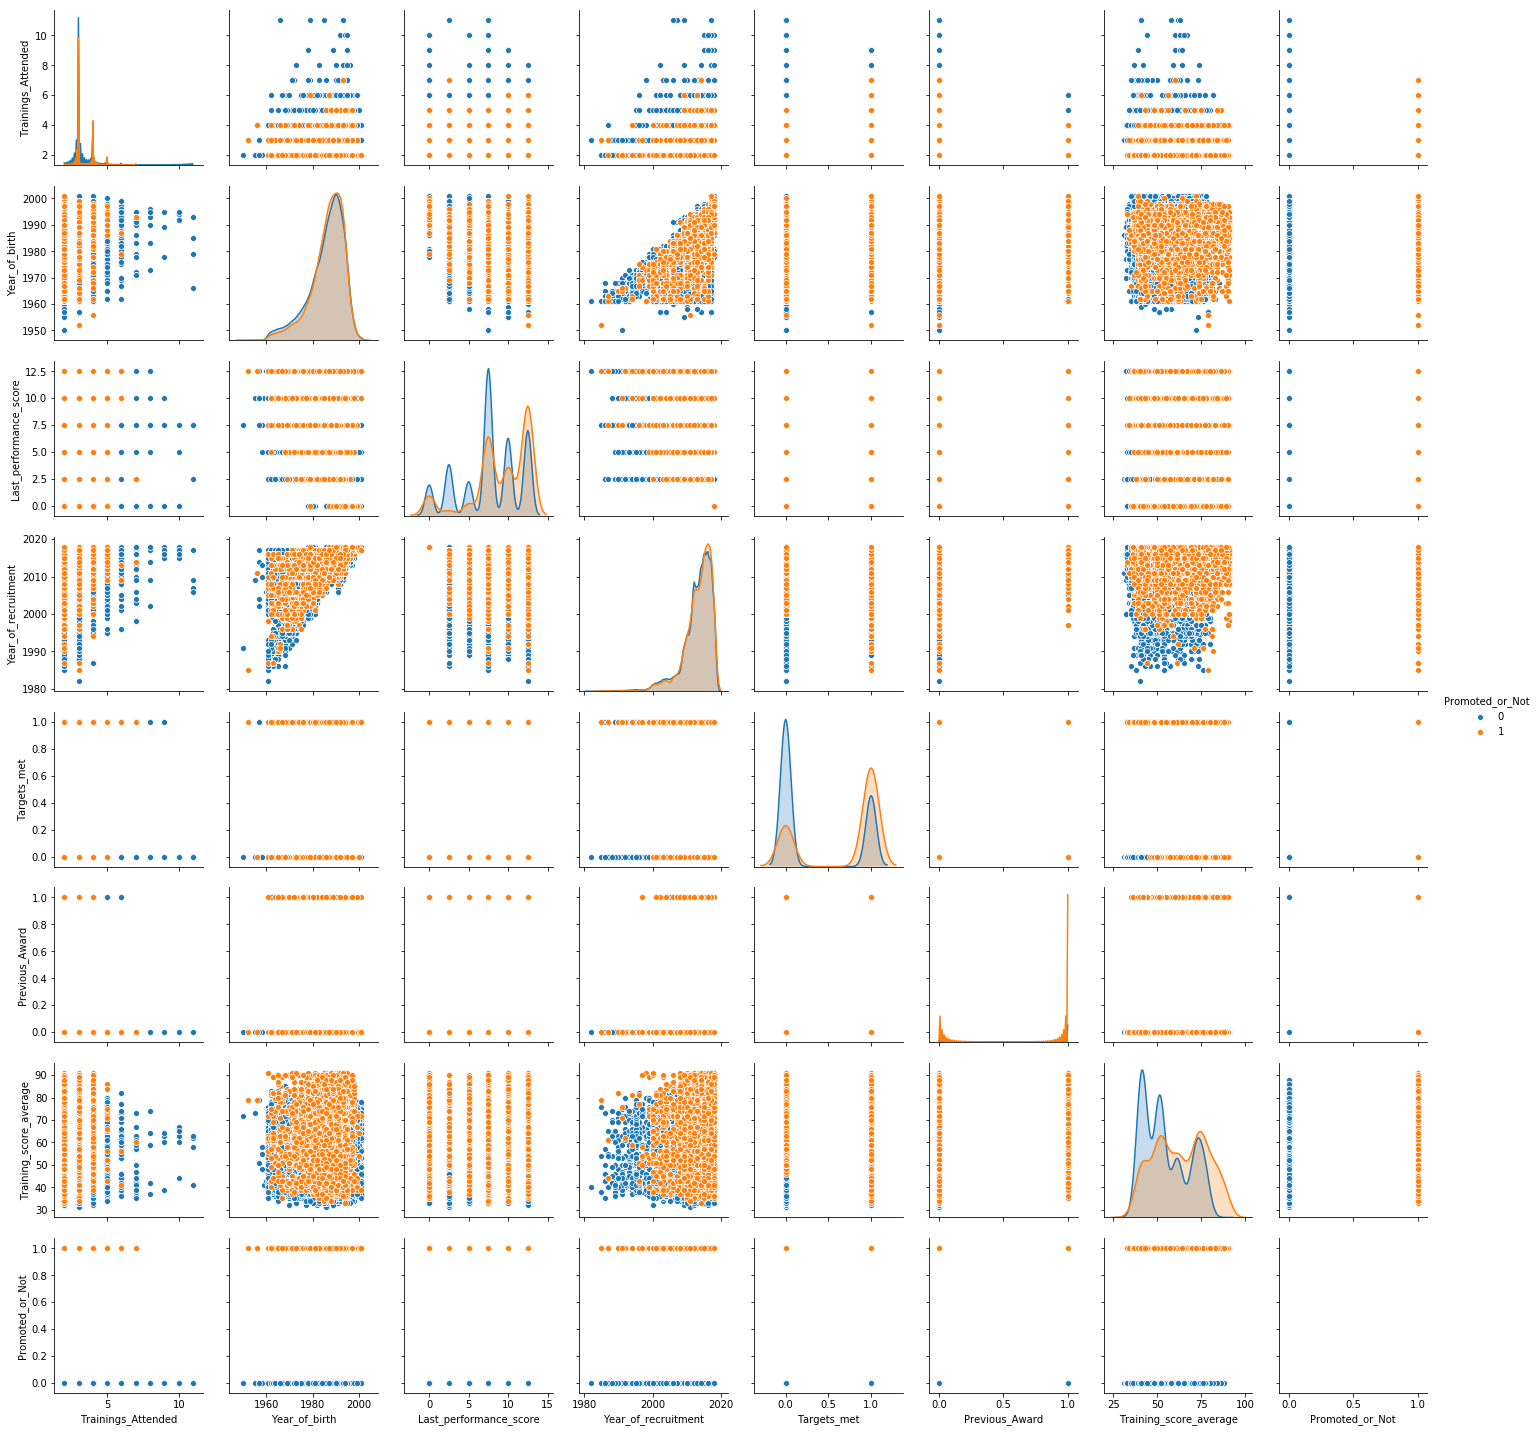

In [32]:
sns.pairplot(Process_Training, hue='Promoted_or_Not');

In [33]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column
for column in Process_Train_Categorical_Columns:
    label_encoder.fit(Process_Training[column])
    print(column)
    print(list(label_encoder.classes_))
    Process_Training[column] = label_encoder.transform(Process_Training[column])
    print(Process_Training[column].unique())

Division
['Business Finance Operations', 'Commercial Sales and Marketing', 'Customer Support and Field Operations', 'Information Technology and Solution Support', 'Information and Strategy', 'People/HR Management', 'Regulatory and Legal services', 'Research and Innovation', 'Sourcing and Purchasing']
[1 2 4 3 8 0 5 7 6]
Qualification
['First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education']
[1 0 2]
Gender
['Female', 'Male']
[0 1]
Channel_of_Recruitment
['Agency and others', 'Direct Internal process', 'Referral and Special candidates']
[1 0 2]
State_Of_Origin
['ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASSARAWA', 'NIGER', 'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO', 'TARABA', 'YOBE', 'ZAMFARA']
[ 3 20 26  2 13 30 24 28 23 11  4 34 18 31 12  7 16 19 32 14 27 15  9

In [34]:
for column in Process_Test_Categorical_Columns:
    Process_Testing[column] = label_encoder.fit_transform(Process_Testing[column])
    print(column)
    print(Process_Testing[column].unique())

Division
[3 7 2 1 8 0 5 4 6]
Qualification
[0 1 2]
Gender
[1 0]
Channel_of_Recruitment
[0 1 2]
State_Of_Origin
[14 19 32  6 24 30  7 20  8 27 18  9 16 29 34  3 25 33 13 11  0  4 28 21
 36 23 26 22 15  1 31 12 35  2 17 10  5]
Foreign_schooled
[1 0]
Marital_Status
[0 2 1]
Past_Disciplinary_Action
[0 1]
Previous_IntraDepartmental_Movement
[0 1]


After encoding the categorical features, another pairplot was created to understand how the categorical features may contribute to predicting the label

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


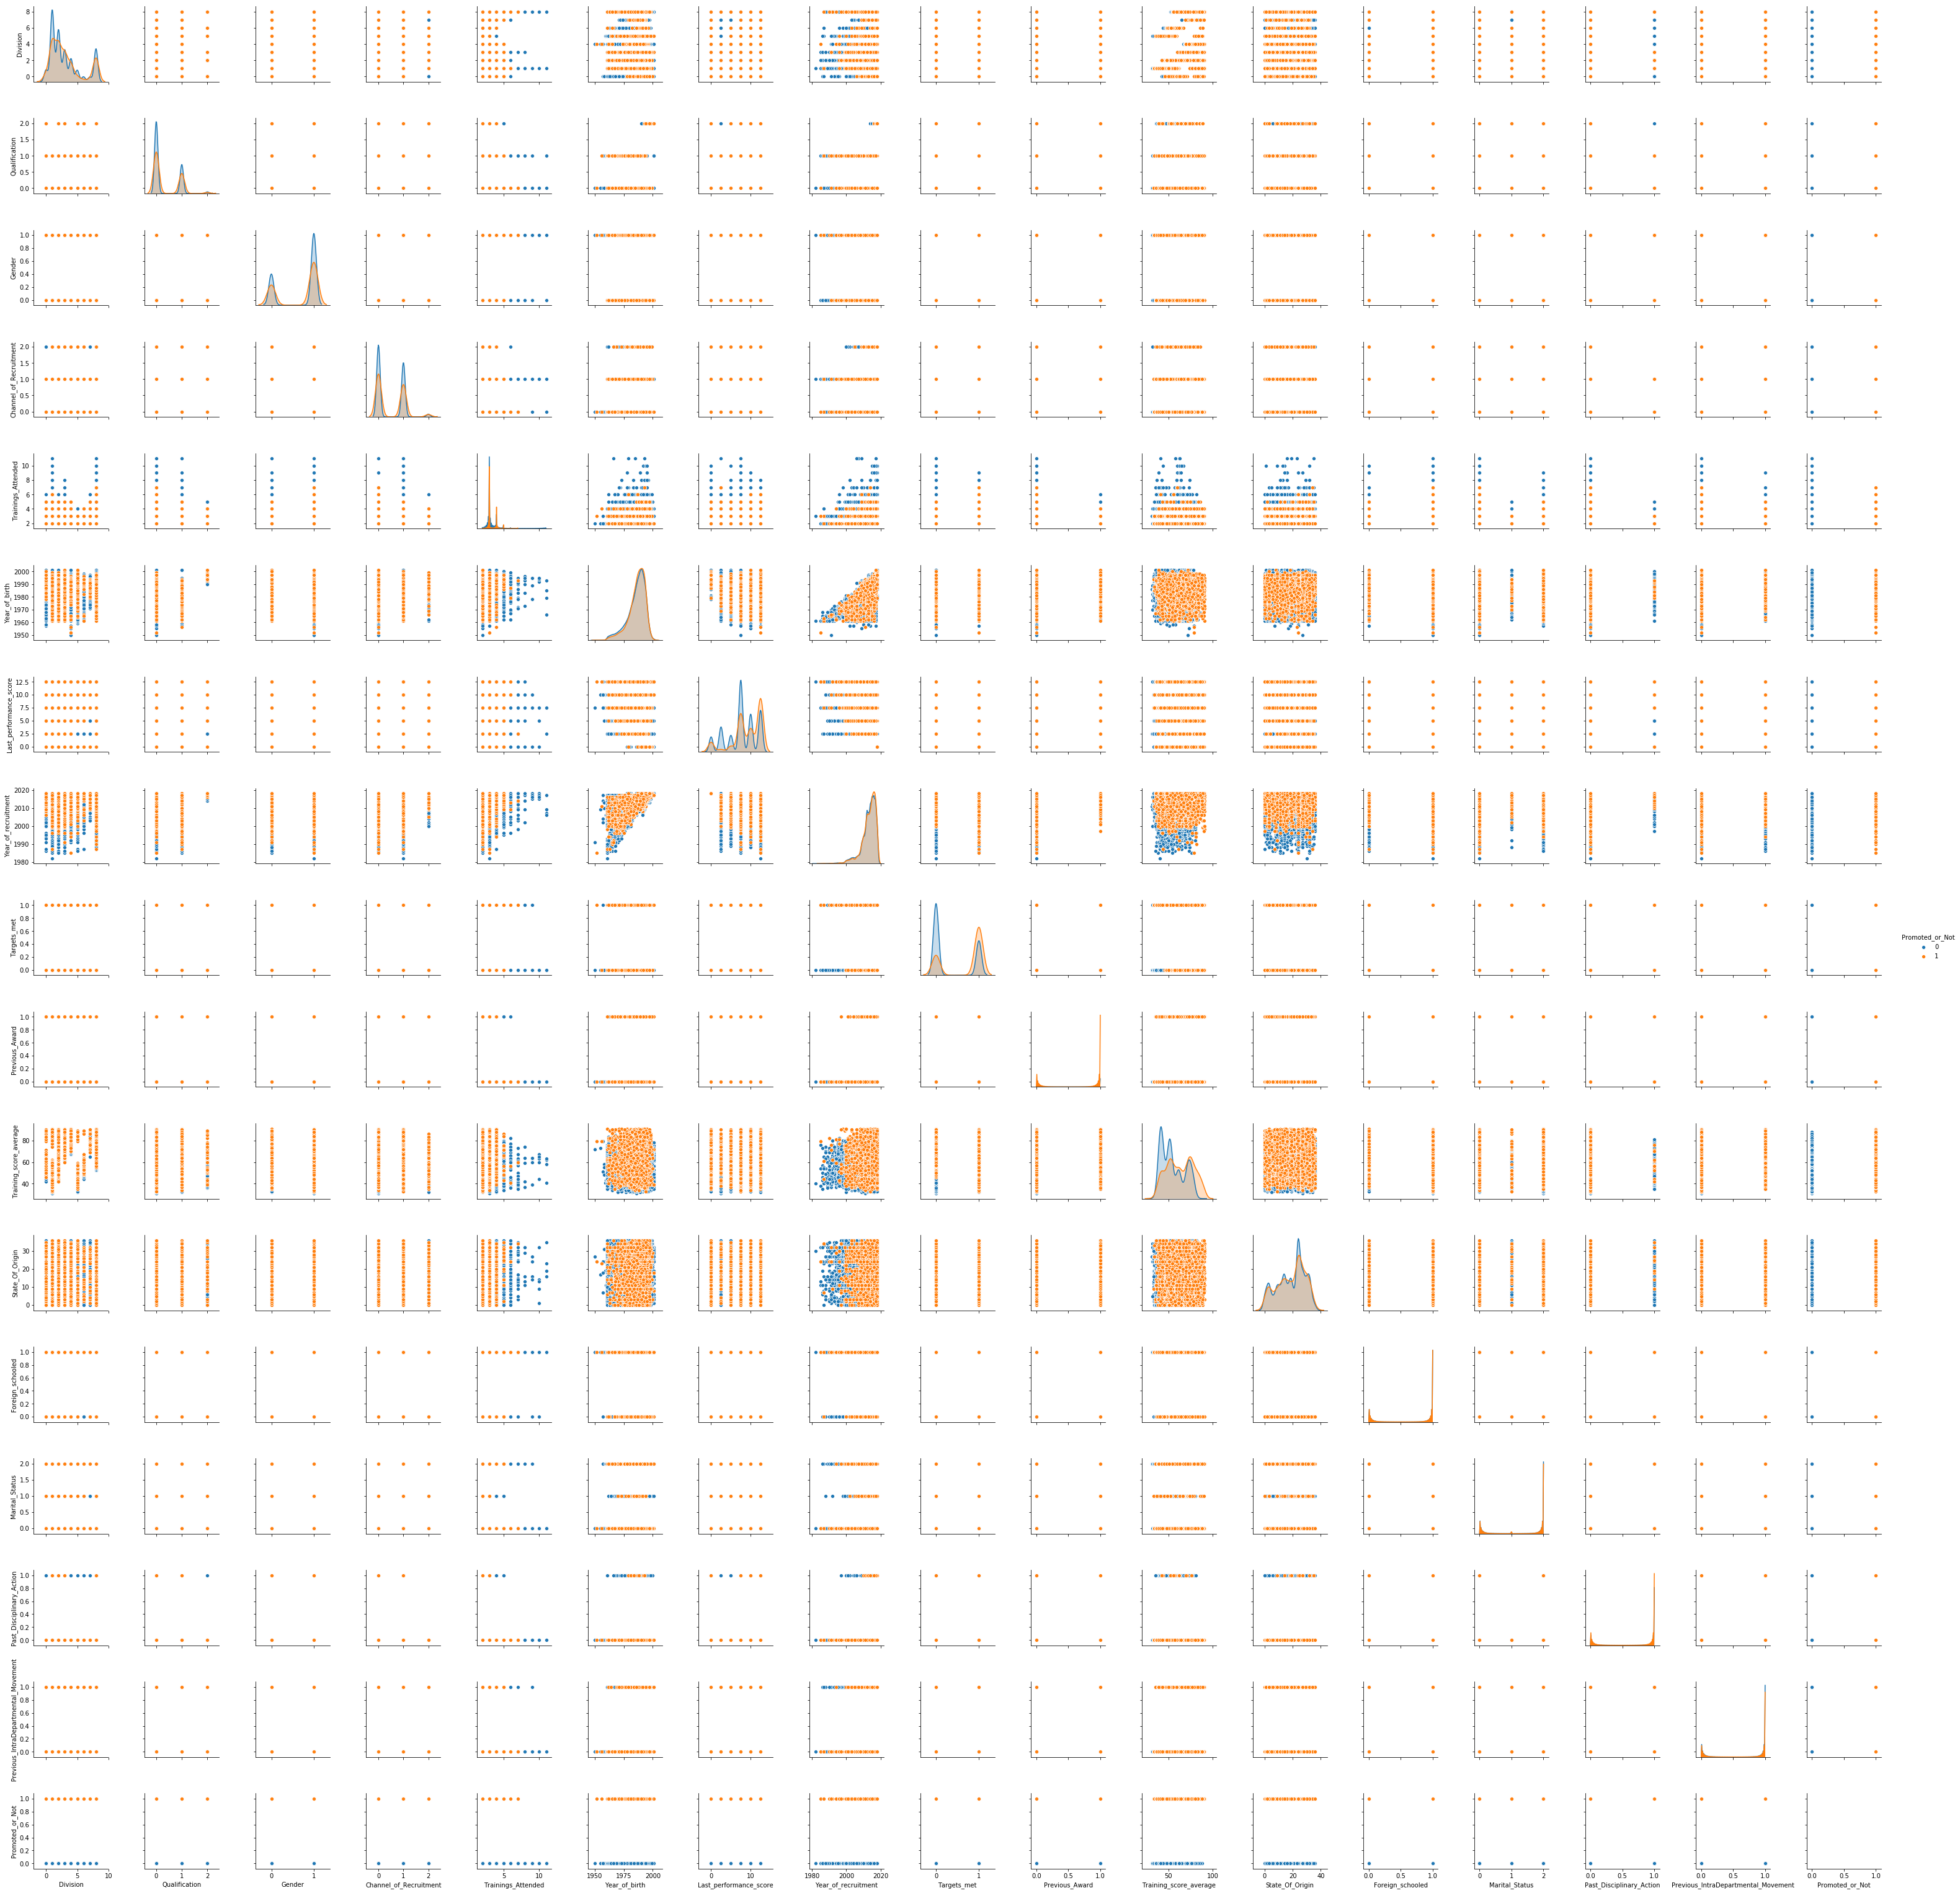

In [35]:
#Process_Train_Categorical_Columns.append('Promoted_or_Not')
sns.pairplot(Process_Training, hue='Promoted_or_Not');

In [36]:
Process_Training

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,YAK/S/00004,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,YAK/S/00006,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38306,YAK/S/54801,5,0,1,0,3,1987,12.5,2016,0,0,44,24,1,0,0,0,1,0
38307,YAK/S/54802,3,0,0,1,2,1990,0.0,2018,0,0,70,24,1,0,0,0,0,0
38308,YAK/S/54805,2,1,0,0,2,1984,5.0,2013,0,0,48,16,1,0,0,0,1,0
38309,YAK/S/54806,4,0,1,0,2,1994,12.5,2016,1,0,71,3,0,0,0,0,3,0


In [37]:
Process_Training.drop("EmployeeNo", axis=1, inplace=True)

**A Little Bit of Correlation**

Correlation helps to identify which features may need engineering which is the next stage of Data Preprocessing and is a whole different ball game on its own.
**It also helps identify which features are more important towards a predictive analysis and machine learning**

In [38]:
Process_Training.corr()['Promoted_or_Not']

Division                               0.012994
Qualification                          0.021866
Gender                                -0.010661
Channel_of_Recruitment                 0.007119
Trainings_Attended                    -0.024842
Year_of_birth                          0.020326
Last_performance_score                 0.119942
Year_of_recruitment                    0.014161
Targets_met                            0.223040
Previous_Award                         0.200696
Training_score_average                 0.178892
State_Of_Origin                        0.004613
Foreign_schooled                       0.001972
Marital_Status                        -0.002958
Past_Disciplinary_Action               0.004162
Previous_IntraDepartmental_Movement   -0.008825
Promoted_or_Not                        1.000000
Name: Promoted_or_Not, dtype: float64

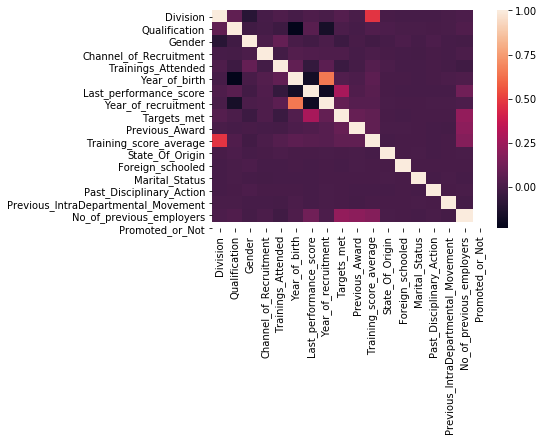

In [39]:
# plot the heatmap
sns.heatmap(Process_Training.corr(), xticklabels=Process_Training.columns, yticklabels=Process_Training.columns, color='green')

**Splitting the data set into test set and training set.**

Getting data ready for predictive analysis and machine learning. Feature Engineering can be performed before this stage.

In [40]:
x = Process_Training.drop("Promoted_or_Not", axis = 1)
y = Process_Training.Promoted_or_Not

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x , y , test_size = 0.2, random_state = 7)

In [42]:
train_test_splits = [X_train, X_test, Y_train, Y_test]
lister=[]
for item in train_test_splits:
    lister.append(item.shape)
    
print('X_train, X_test, Y_train, Y_test have shape of {0}'.format(lister))

X_train, X_test, Y_train, Y_test have shape of [(29306, 17), (7327, 17), (29306,), (7327,)]


**IN conclusion, Data PreProcessing determines how you refine and talk to your data. It could make or break your data.**